In [1]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Loading fashion dataset 

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step



#  Checking the shape of our datset

In [5]:
print(train_images.shape)
print(train_labels)
print(test_images.shape)
print(test_labels)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)
[9 2 1 ... 8 1 5]



# Classes in our dataset

In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


# Checking an image

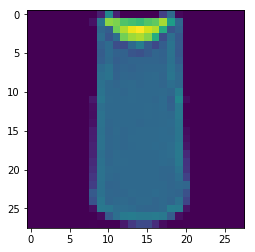

T-shirt/top


In [12]:
plt.figure()
plt.imshow(train_images[2])

plt.grid(False)
plt.show()
print(class_names[train_labels[2]])


# Normalization

In [13]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255


# Building the model


In [14]:
# Two layer NN 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),     #Input Layer
    keras.layers.Dense(128,activation=tf.nn.relu), #Hidden Layer
    keras.layers.Dense(10,activation=tf.nn.softmax) #Output Layer
]
)

Instructions for updating:
Colocations handled automatically by placer.



# Compile the model

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


# Training the model

In [16]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 28s 466us/sample - loss: 0.4988 - acc: 0.8259
Epoch 2/5
60000/60000 [==============================] - 21s 357us/sample - loss: 0.3747 - acc: 0.8648
Epoch 3/5
60000/60000 [==============================] - 17s 283us/sample - loss: 0.3367 - acc: 0.8770
Epoch 4/5
60000/60000 [==============================] - 17s 287us/sample - loss: 0.3139 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 17s 280us/sample - loss: 0.2946 - acc: 0.8901



# Testing against test values

In [17]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3463935406923294
Test accuracy: 0.8748


# Prediction

In [20]:
prediction = model.predict(test_images[2000:2001])
print(prediction[0])
print('Thresholded output',(prediction>0.5)*1)


[5.4923439e-06 4.3651813e-08 1.6090278e-06 1.8811745e-06 3.2615953e-05
 1.4272436e-07 1.7715779e-07 1.4190441e-06 9.9995661e-01 2.0615527e-08]
Thresholded output [[0 0 0 0 0 0 0 0 1 0]]


# Saving the model

In [21]:
model.save("Fashion.h5")